In [88]:
import pandas as pd
df = pd.read_csv('https://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [89]:
fish_data = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = df['Species'].to_numpy()

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.2, random_state=42
)

In [92]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [93]:
from sklearn.linear_model import SGDClassifier

In [94]:
sc = SGDClassifier(loss='log_loss', n_jobs=-1) # 로지스틱 손실 함수 - binary crossentropy, categorical crossentropy 

In [95]:
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [96]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.7480314960629921
테스트세트: 0.71875


In [97]:
sc.partial_fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [98]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.8346456692913385
테스트세트: 0.875


In [99]:
sc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype='<U9')

In [100]:
import numpy as np

np.round(sc.predict_proba(test_scaled[:5]), decimals=3)

array([[0.   , 0.   , 0.917, 0.   , 0.   , 0.   , 0.083],
       [0.   , 0.   , 0.037, 0.   , 0.   , 0.96 , 0.003],
       [0.   , 0.   , 0.002, 0.998, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.958, 0.   , 0.01 , 0.   , 0.033],
       [0.   , 0.   , 0.978, 0.   , 0.001, 0.   , 0.021]])

In [101]:
sc = SGDClassifier(max_iter=1, tol=None, loss='log_loss')
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [102]:
train_score = []
test_score = []
train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도

for _ in range(599):
    sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
    test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도


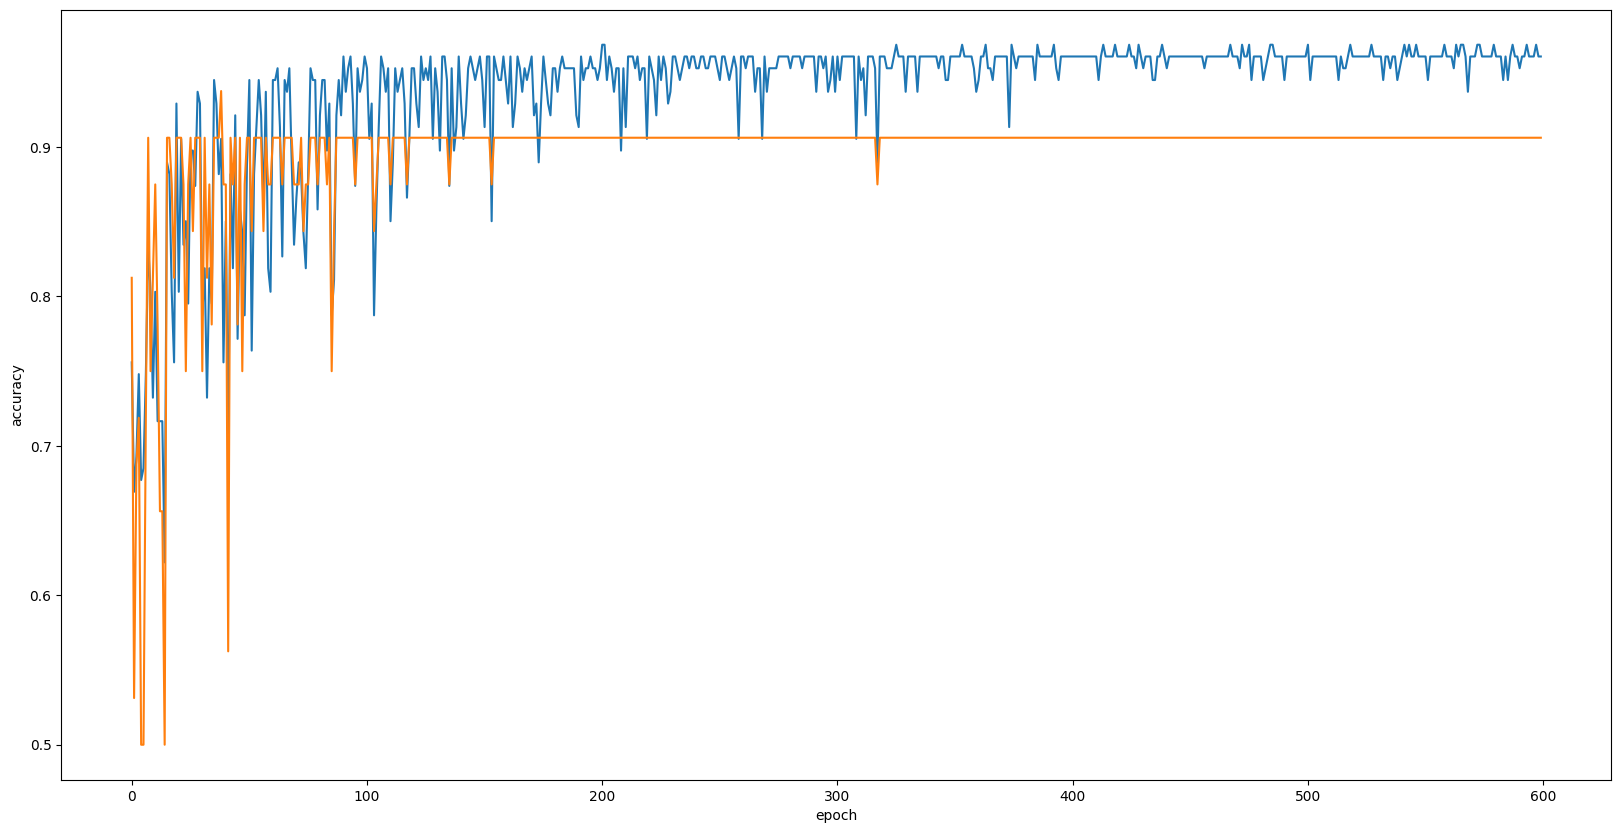

In [103]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [104]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None)
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [105]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.8818897637795275
테스트세트: 0.90625


In [106]:
# GridSearchCV를 통한 최적의 하이퍼파라미터와 최적의 모델을 검색 
from sklearn.model_selection import GridSearchCV
params = {
    'max_iter': np.arange(50, 1000),
    'tol': np.arange(0.0001, 1, 0.0001),
    'alpha': [0.0001, 0.001, 0.1, 1, 10, 100, 100]
}

sc = SGDClassifier(loss='log_loss')
gs = GridSearchCV(sc, params, n_jobs=-1)

In [107]:
gs.fit(train_scaled, train_target)

c:\김용준\09 핀테크 머신러닝과 딥러닝 이해\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# RandomizedSearchCV 
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_iter': randint(50, 1000),
    'tol': uniform(0.001, 1),
    'alpha': uniform(0.001, 100)
}

In [ ]:
sc = SGDClassifier(loss='log_loss')
rs = RandomizedSearchCV(sc, params, n_iter=500, n_jobs=-1, random_state=42)

In [ ]:
rs.fit(train_scaled, train_target)

c:\Users\admin\Desktop\이용교\09 핀테크 머신러닝과 딥러닝 이해\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,estimator,SGDClassifier(loss='log_loss')
,param_distributions,"{'alpha': <scipy.stats....001BA2DBE52B0>, 'max_iter': <scipy.stats....001BA2DAC8AD0>, 'tol': <scipy.stats....001BA2D8667E0>}"
,n_iter,500
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [ ]:
rs.best_params_

{'alpha': np.float64(0.02475235758845795),
 'max_iter': 830,
 'tol': np.float64(0.529937134027212)}

In [ ]:
model = rs.best_estimator_
model

,loss,'log_loss'
,penalty,'l2'
,alpha,np.float64(0....5235758845795)
,l1_ratio,0.15
,fit_intercept,True
,max_iter,830
,tol,np.float64(0.529937134027212)
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [ ]:
print("학습세트:", model.score(train_scaled, train_target))
print("테스트세트:", model.score(test_scaled, test_target))

학습세트: 0.7322834645669292
테스트세트: 0.84375


In [ ]:
# 5-fold 검증 값 cv_results_
np.mean(rs.cv_results_['mean_test_score'])

np.float64(0.320892923076923)